> Reference:
+ [machine learning mastery](http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)

In [24]:
# data
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy

#pandas.options.display.mpl_style='default'
plt.style.use('ggplot')

# visualize data in order to understand attributes 
# alone and their interactions.

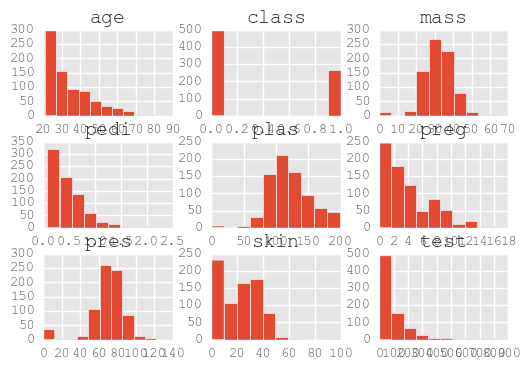

In [42]:
# Univariate Histograms
data.hist()
plt.show()

# We can see that perhaps the attributes age, pedi and test may have an exponential distribution. We can also see that 
# perhaps the mass and pres and plas attributes may have a Gaussian or nearly Gaussian distribution. This is interesting 
# because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

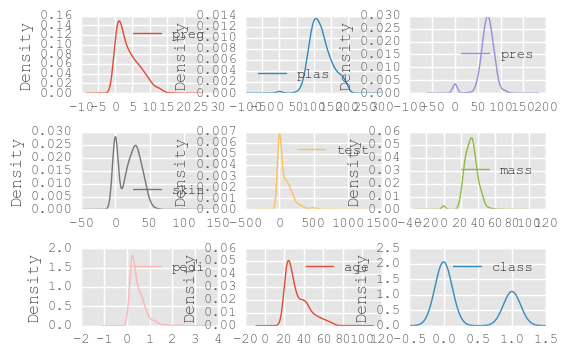

In [43]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

# We can see the distribution for each attribute is clearer than the histograms.

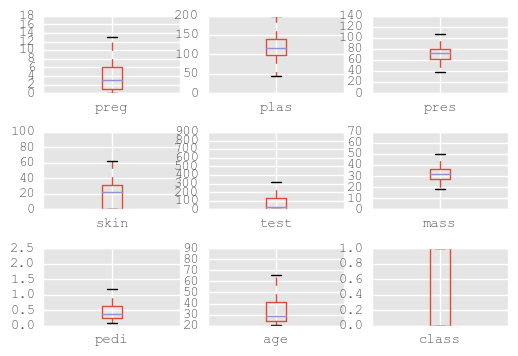

In [44]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# We can see that the spread of attributes is quite different. Some like age, test and skin appear quite skewed towards 
# smaller values.

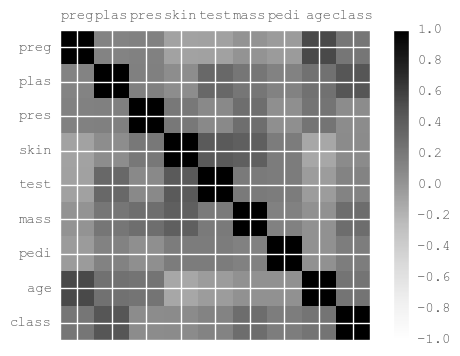

In [45]:
# Multivariate: Correlation Matrix Plot
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

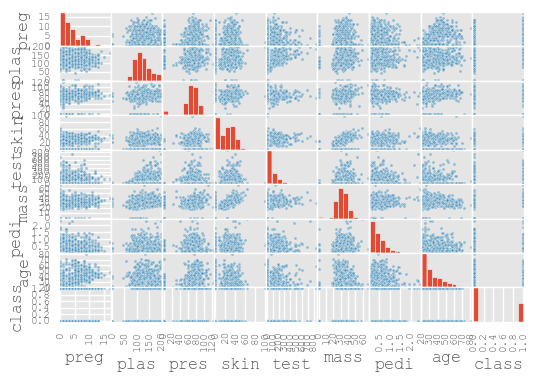

In [46]:
# Multivariate: Scatterplot Matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [47]:
# correlation between data attributes and class
def plot_corr(data, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

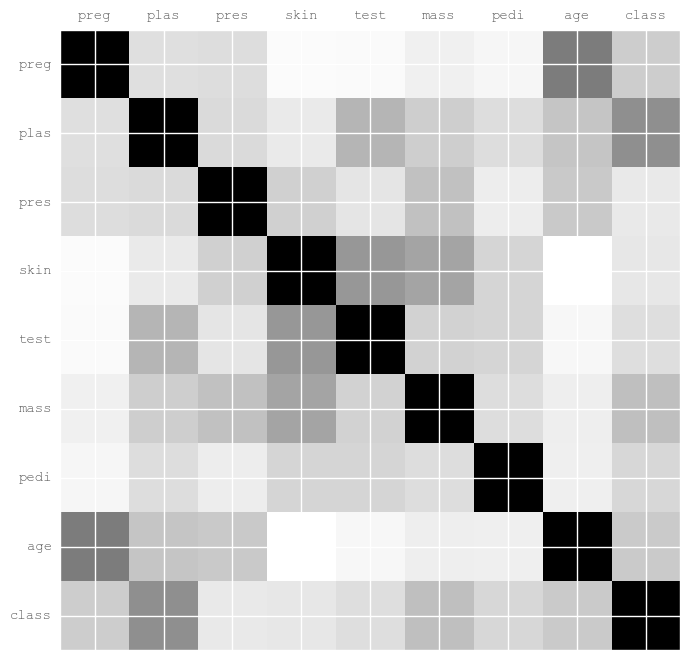

In [48]:
plot_corr(data,8)

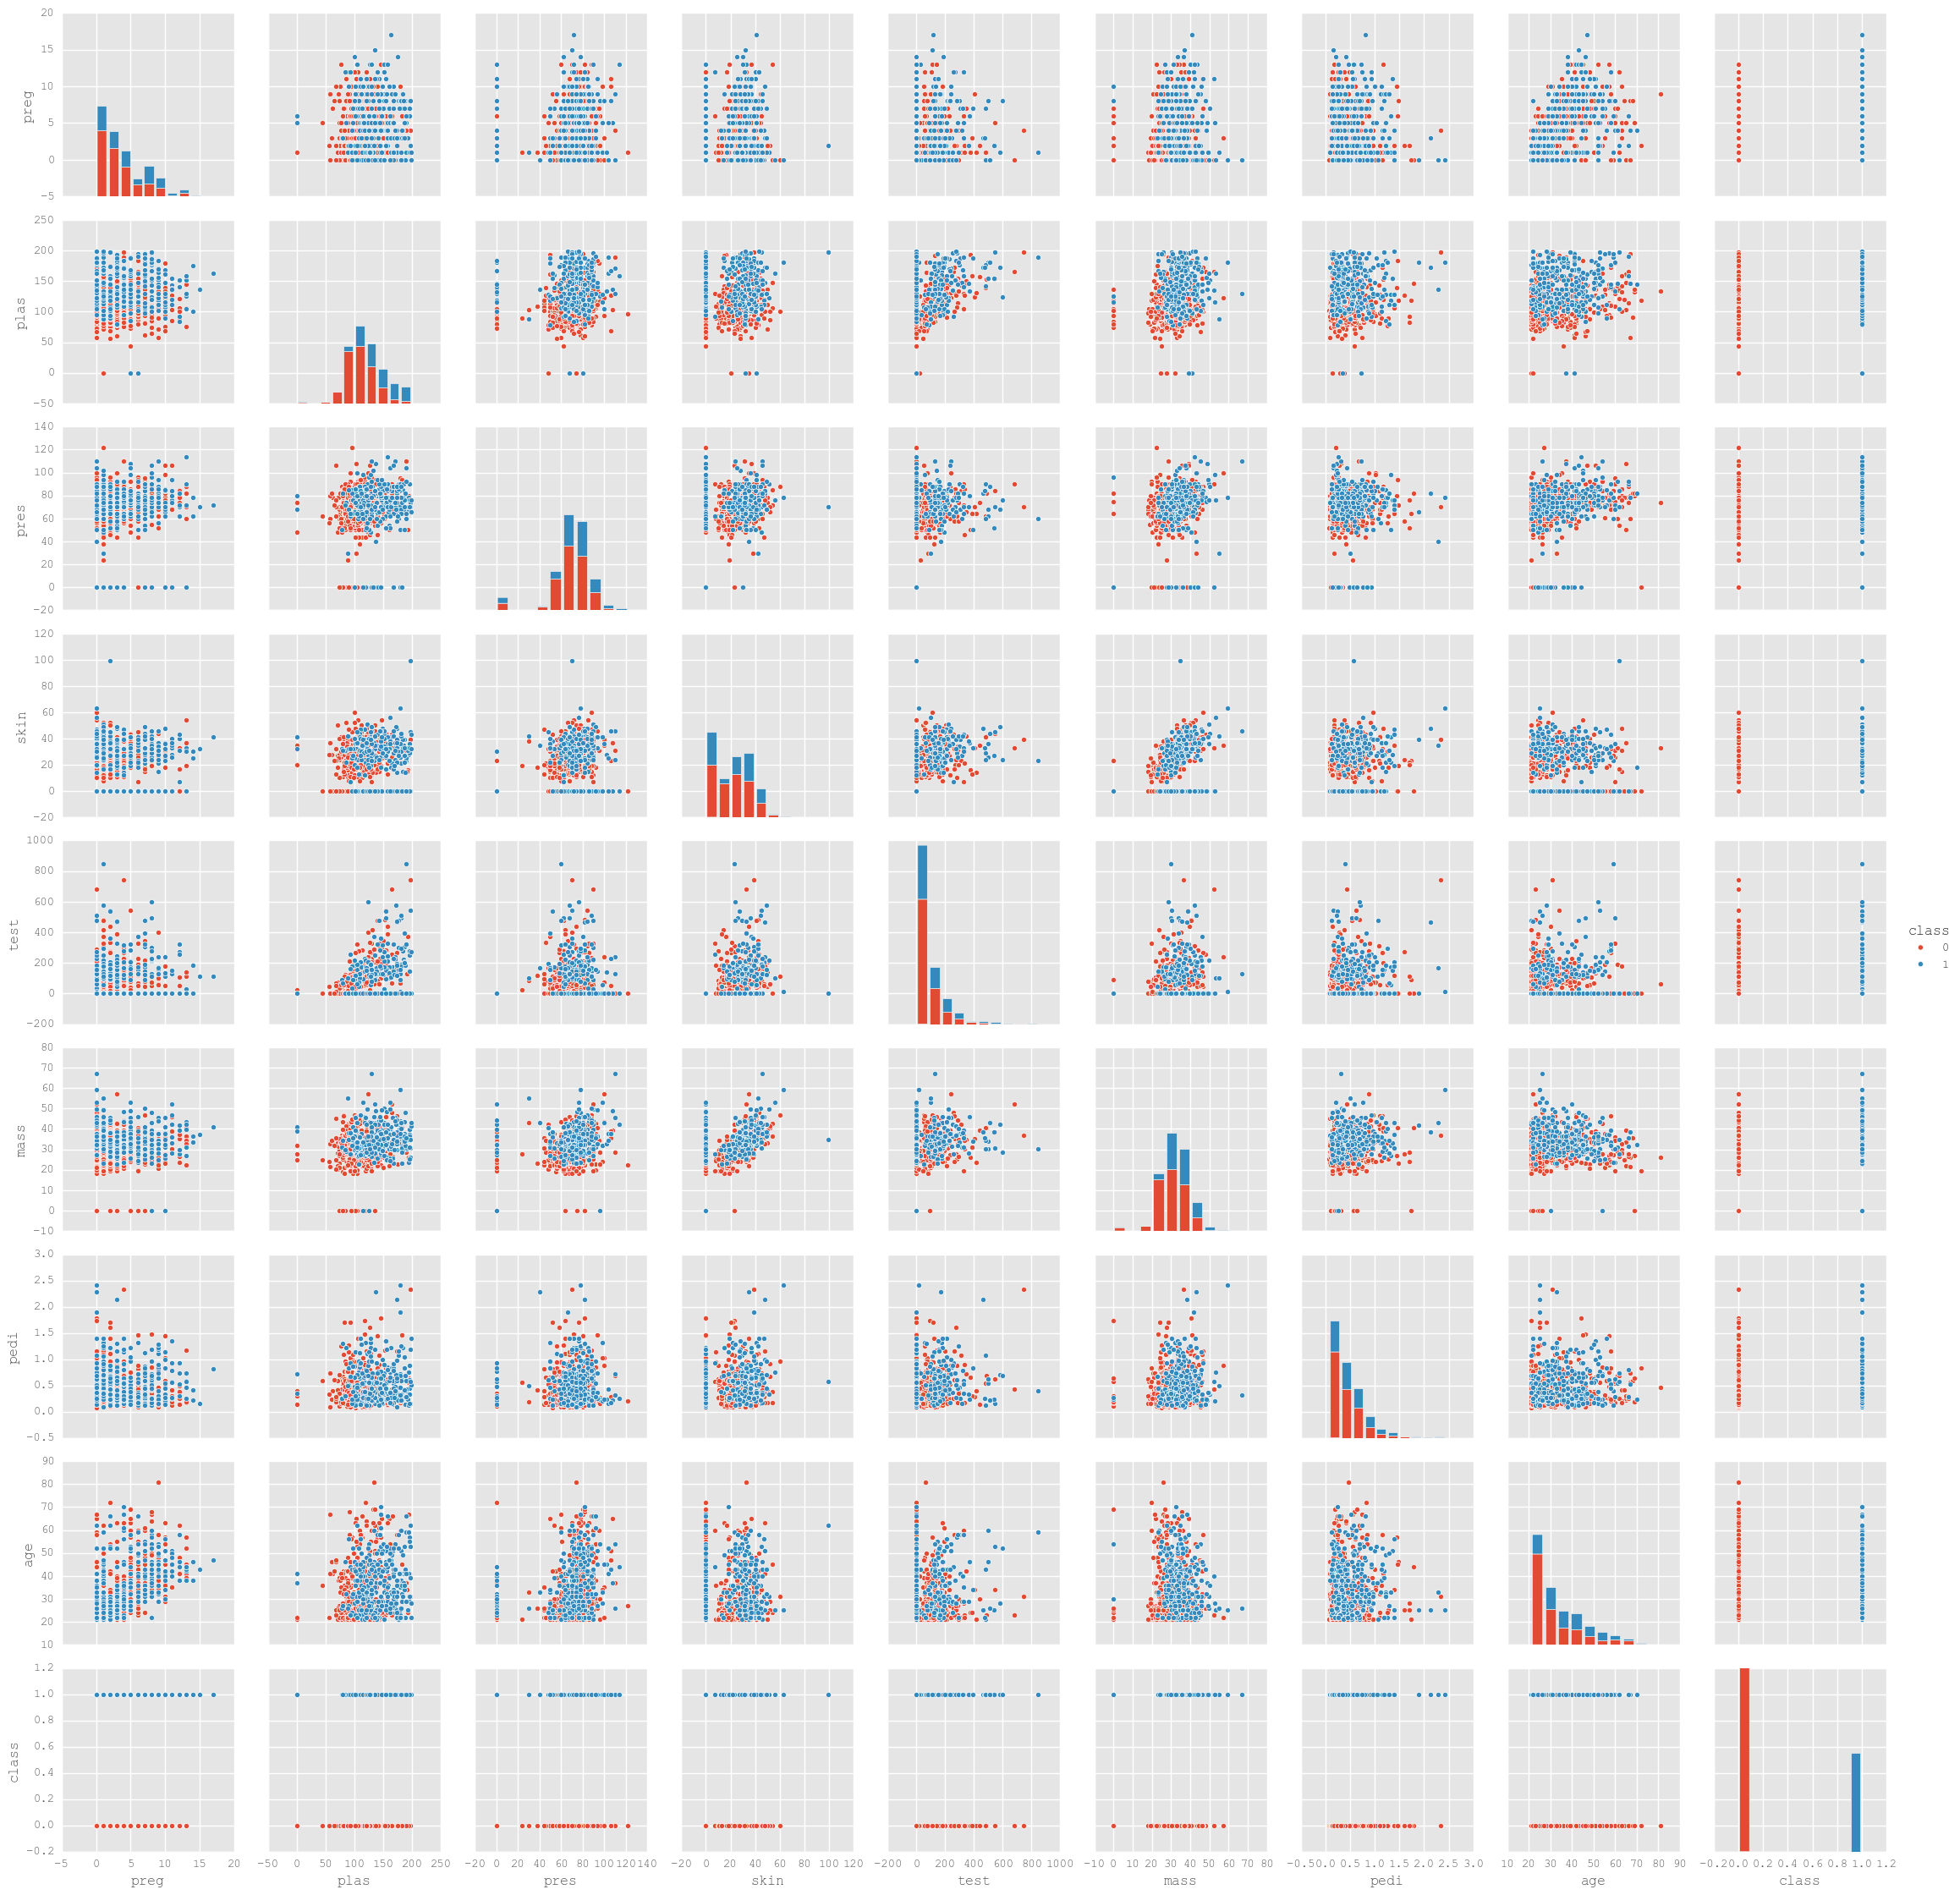

In [49]:
seaborn.pairplot(data,hue="class")